In [ ]:
!pip install xgboost


[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: pip install --upgrade pip


In [ ]:
pip install --upgrade pip

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 3.1 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: pip
    Found existing installation: pip 23.3.1
    Uninstalling pip-23.3.1:
      Successfully uninstalled pip-23.3.1
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split ,RandomizedSearchCV , GridSearchCV
from sklearn.metrics import confusion_matrix , classification_report  , f1_score , recall_score , precision_score , RocCurveDisplay

In [ ]:
df = pd.read_csv('heart.csv')

In [ ]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [ ]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [ ]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [ ]:
df['Cholesterol'] = np.where(df['Cholesterol'] == 0, np.nan, df['Cholesterol'])
df['RestingBP'] = np.where(df['RestingBP'] == 0, np.nan, df['RestingBP'])
df['FastingBS'] = np.where(df['FastingBS'] == 0, np.nan, df['FastingBS'])

<Axes: xlabel='ChestPainType', ylabel='count'>

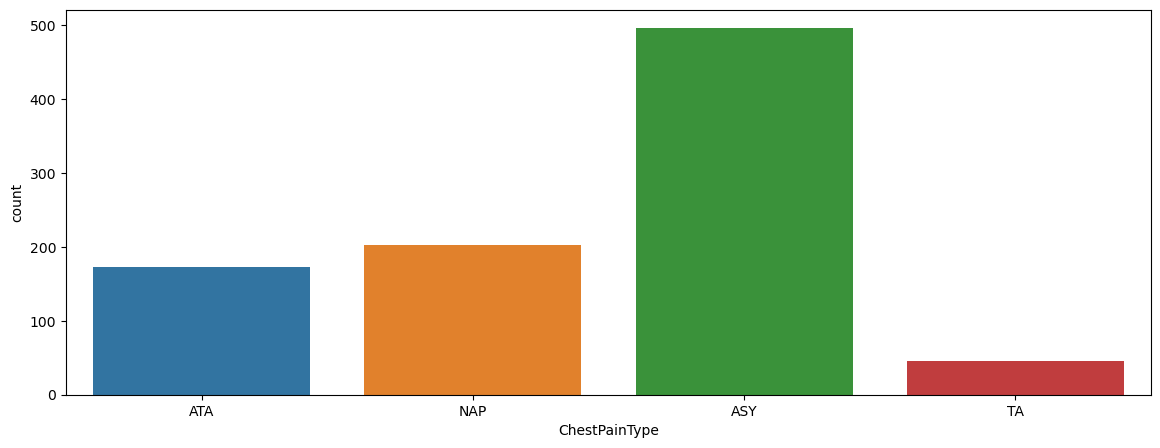

In [ ]:
fig = plt.figure(figsize = (14,5))
sns.countplot(x = df['ChestPainType'])

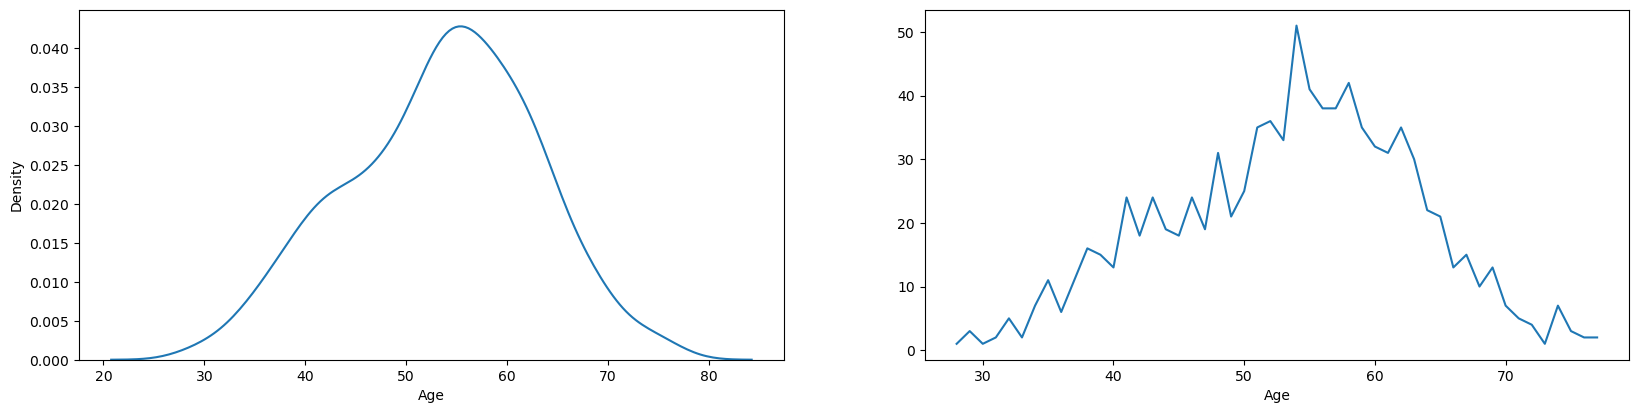

In [ ]:
fig = plt.figure(figsize = (20,10))
ax1 = fig.add_subplot(221)
sns.kdeplot(df.Age.dropna())

ax2 = fig.add_subplot(222)
df['Age'].value_counts().sort_index().plot.line()
plt.show()

/var/folders/bz/7mgmc8711mqg_0mcltd3xkww0000gn/T/ipykernel_1496/495051916.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=False`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x = 'Age', y = 'Cholesterol', data = df, color = 'r' , shade = False)


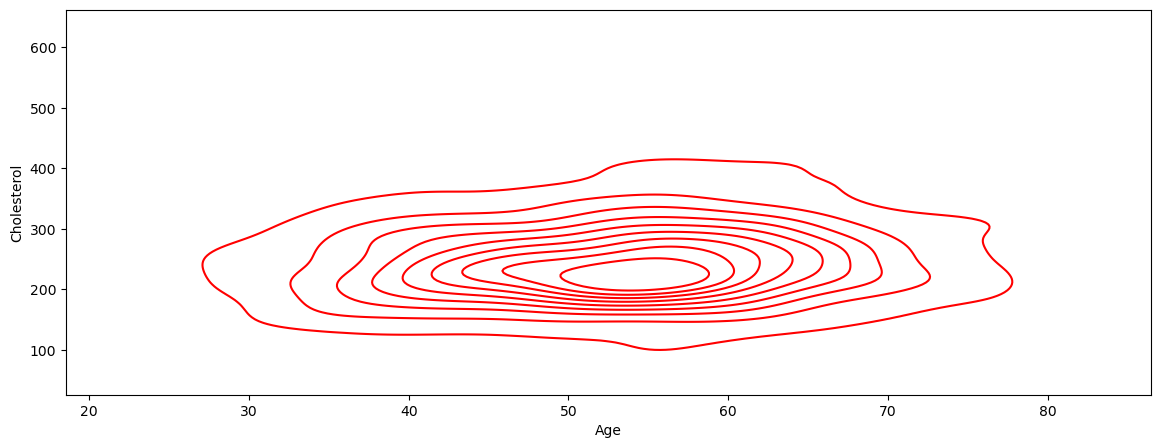

In [ ]:
fig = plt.figure(figsize = (14,5))
sns.kdeplot(x = 'Age', y = 'Cholesterol', data = df, color = 'r' , shade = False)
plt.show()

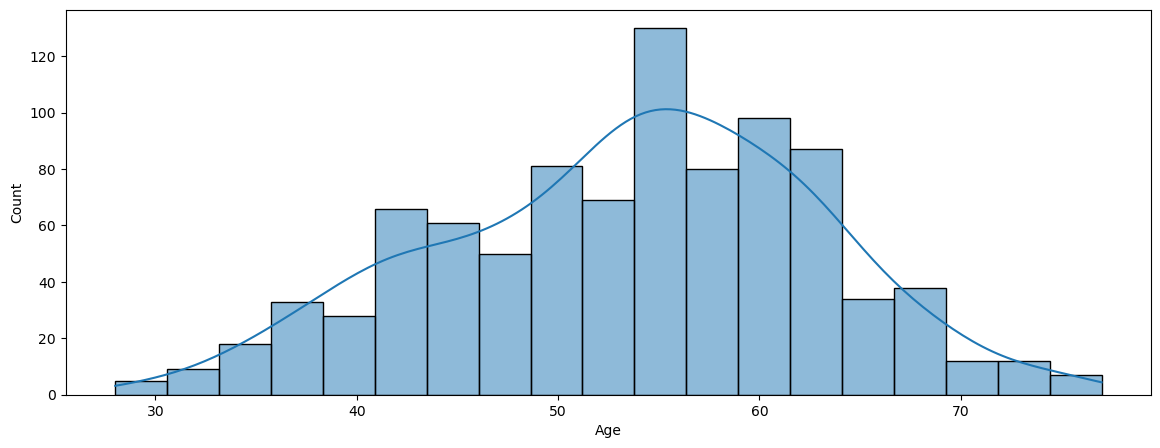

In [ ]:
fig = plt.figure(figsize = (14,5))
sns.histplot(df['Age'], kde = True)
plt.show()

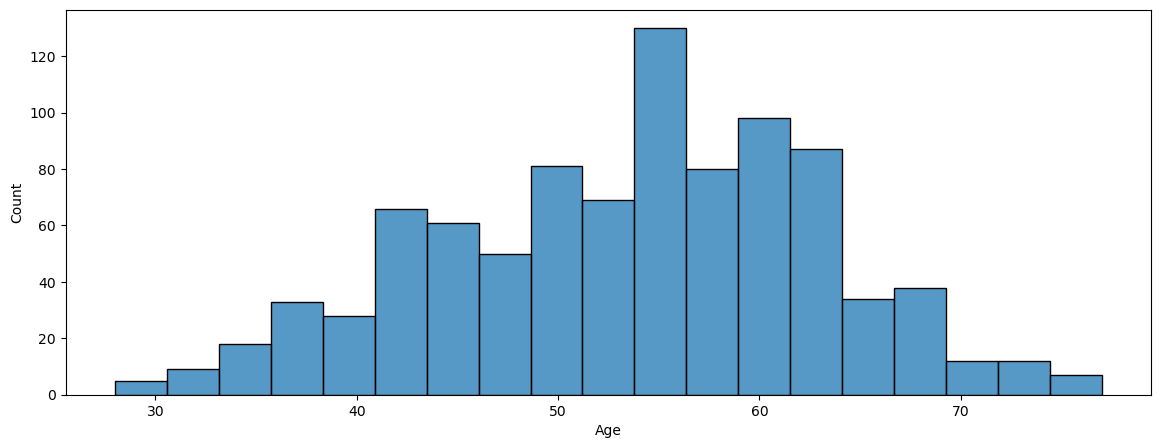

In [ ]:
fig = plt.figure(figsize = (14,5))
sns.histplot(df['Age'], kde = False)
plt.show()

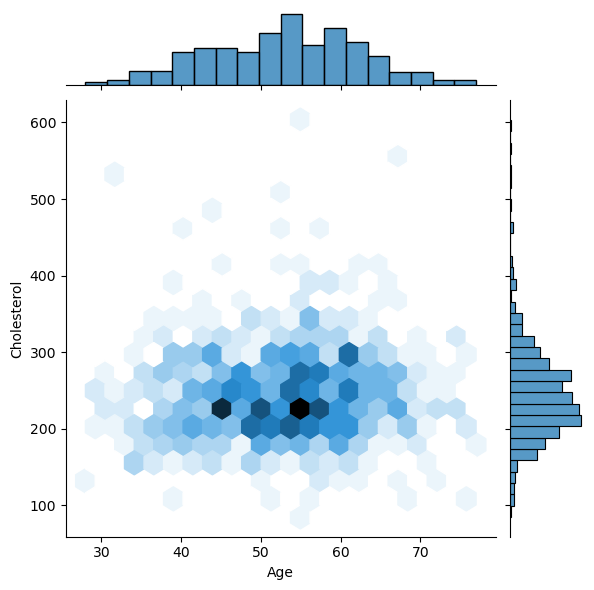

In [ ]:
sns.jointplot(x = 'Age', y = 'Cholesterol', data = df, kind = 'hex',gridsize = 20)
plt.show()

<Axes: xlabel='Cholesterol', ylabel='Age'>

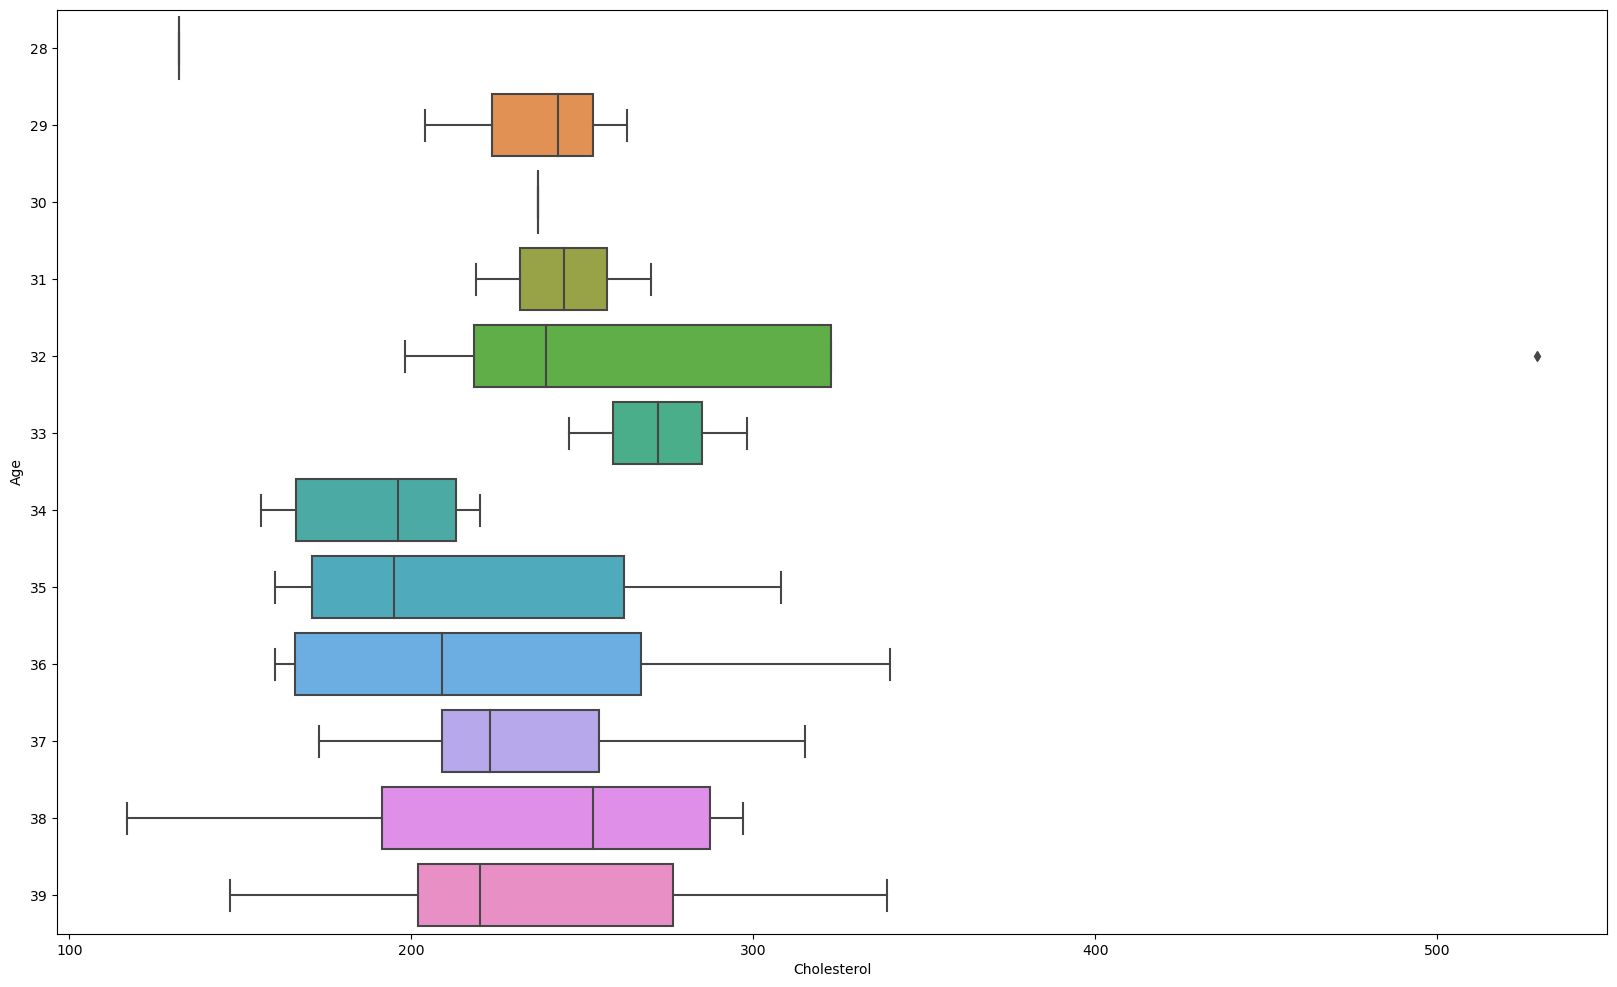

In [ ]:
plt.figure(figsize = (20,12))
sns.boxplot(y = 'Age', x = 'Cholesterol', data = df[df.Age.isin(np.arange(20,40,1))],orient = 'h')

<Axes: xlabel='Sex', ylabel='MaxHR'>

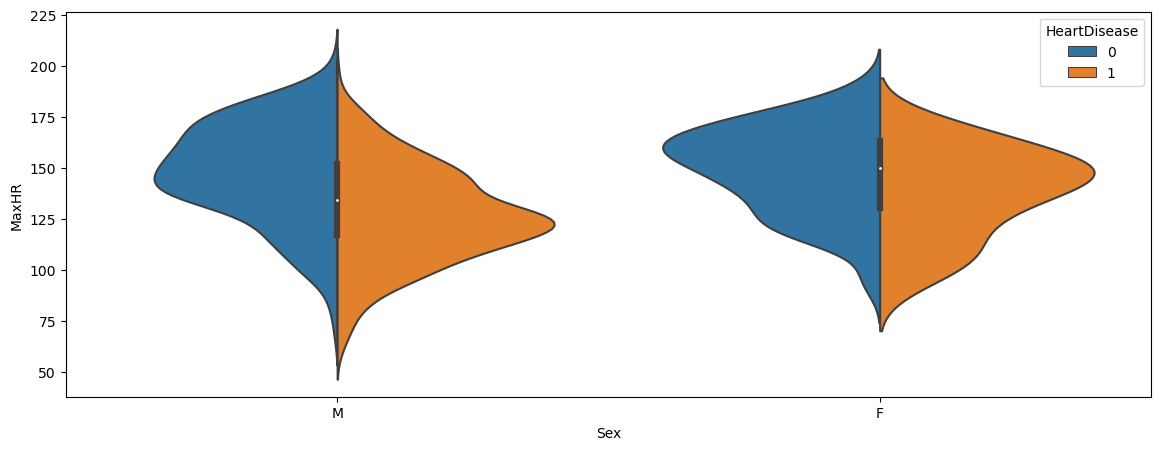

In [ ]:
fig = plt.figure(figsize = (14,5))
sns.violinplot(y = 'MaxHR',x = 'Sex', hue = 'HeartDisease', split = True, data = df)

/Users/ritushreedey/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


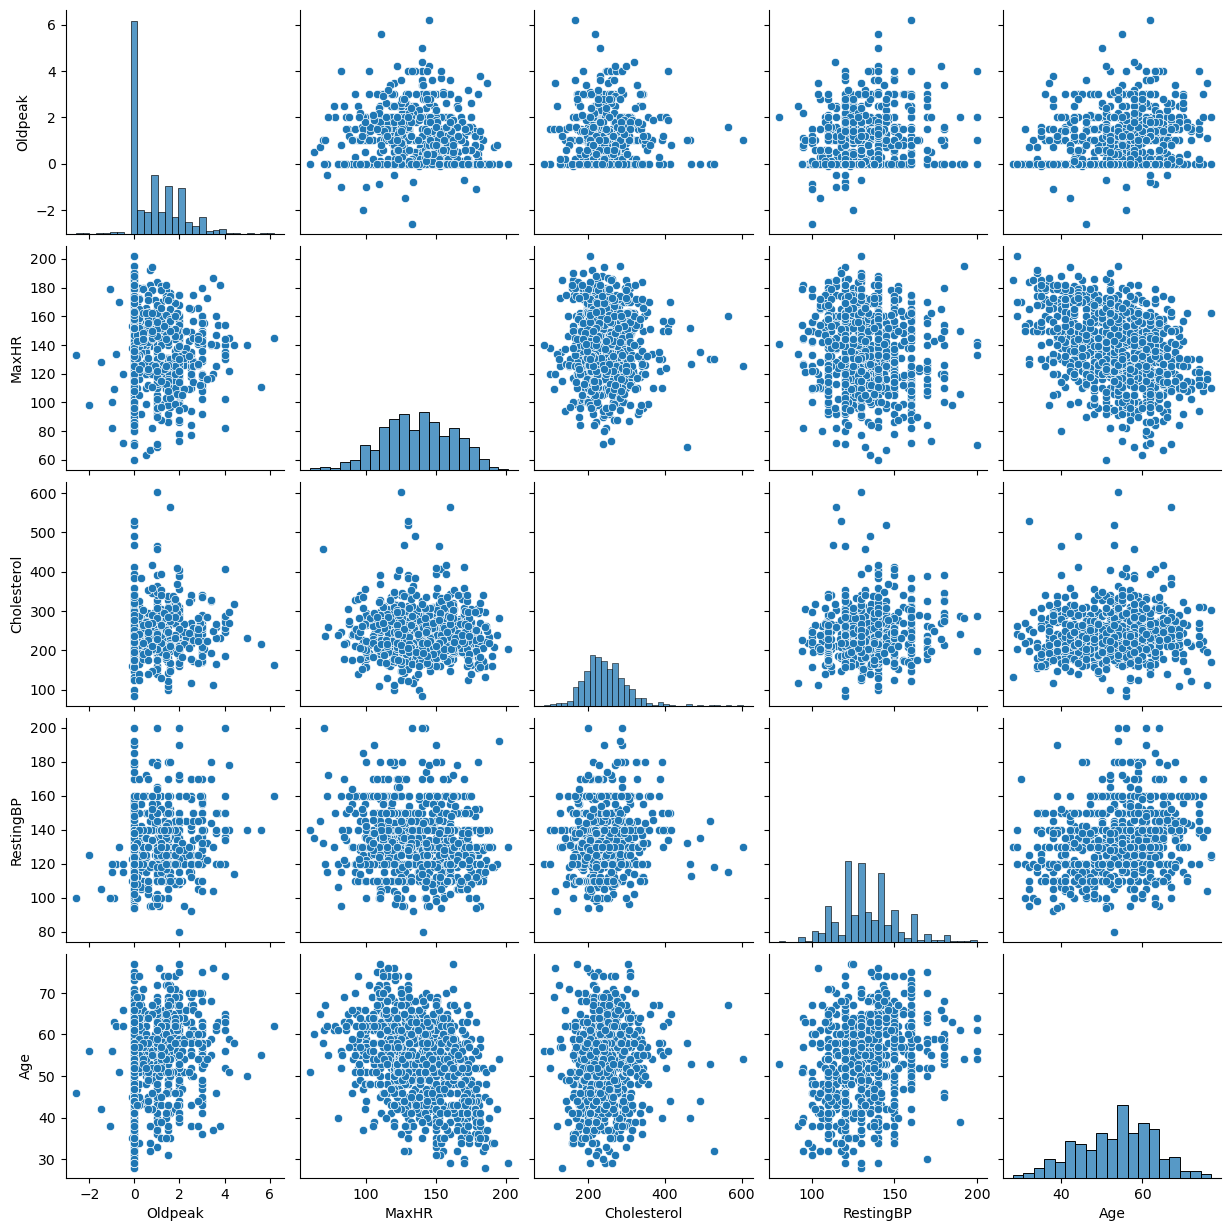

In [ ]:
cols = ['Oldpeak', 'MaxHR', 'Cholesterol', 'RestingBP', 'Age']
sns_plot = sns.pairplot(df[cols])

In [ ]:
df[cols].dropna().corr()

,Oldpeak,MaxHR,Cholesterol,RestingBP,Age
Oldpeak,1.000000,-0.259533,0.058488,0.198575,0.286006
MaxHR,-0.259533,1.000000,-0.019856,-0.125774,-0.382112
Cholesterol,0.058488,-0.019856,1.000000,0.095939,0.058758
RestingBP,0.198575,-0.125774,0.095939,1.000000,0.259865
Age,0.286006,-0.382112,0.058758,0.259865,1.000000


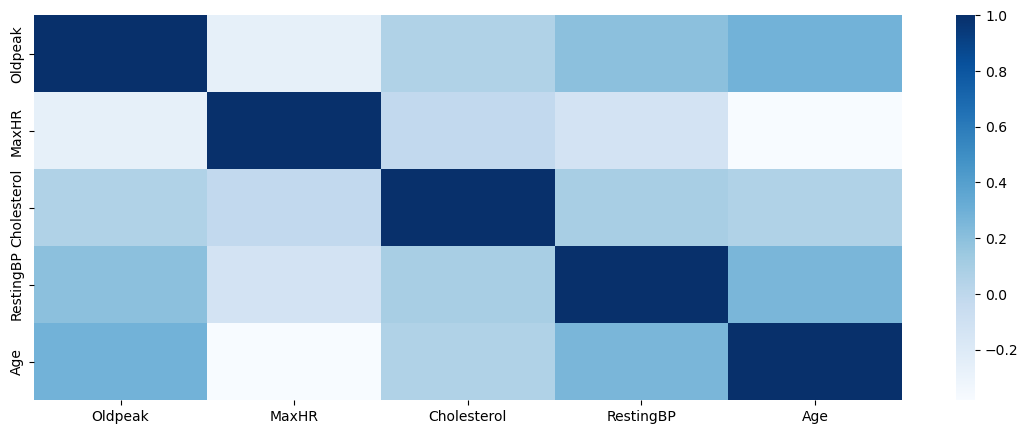

In [ ]:
fig = plt.figure(figsize = (14,5))
sns.heatmap(df[cols].dropna().corr(), cmap = 'Blues')
plt.show()

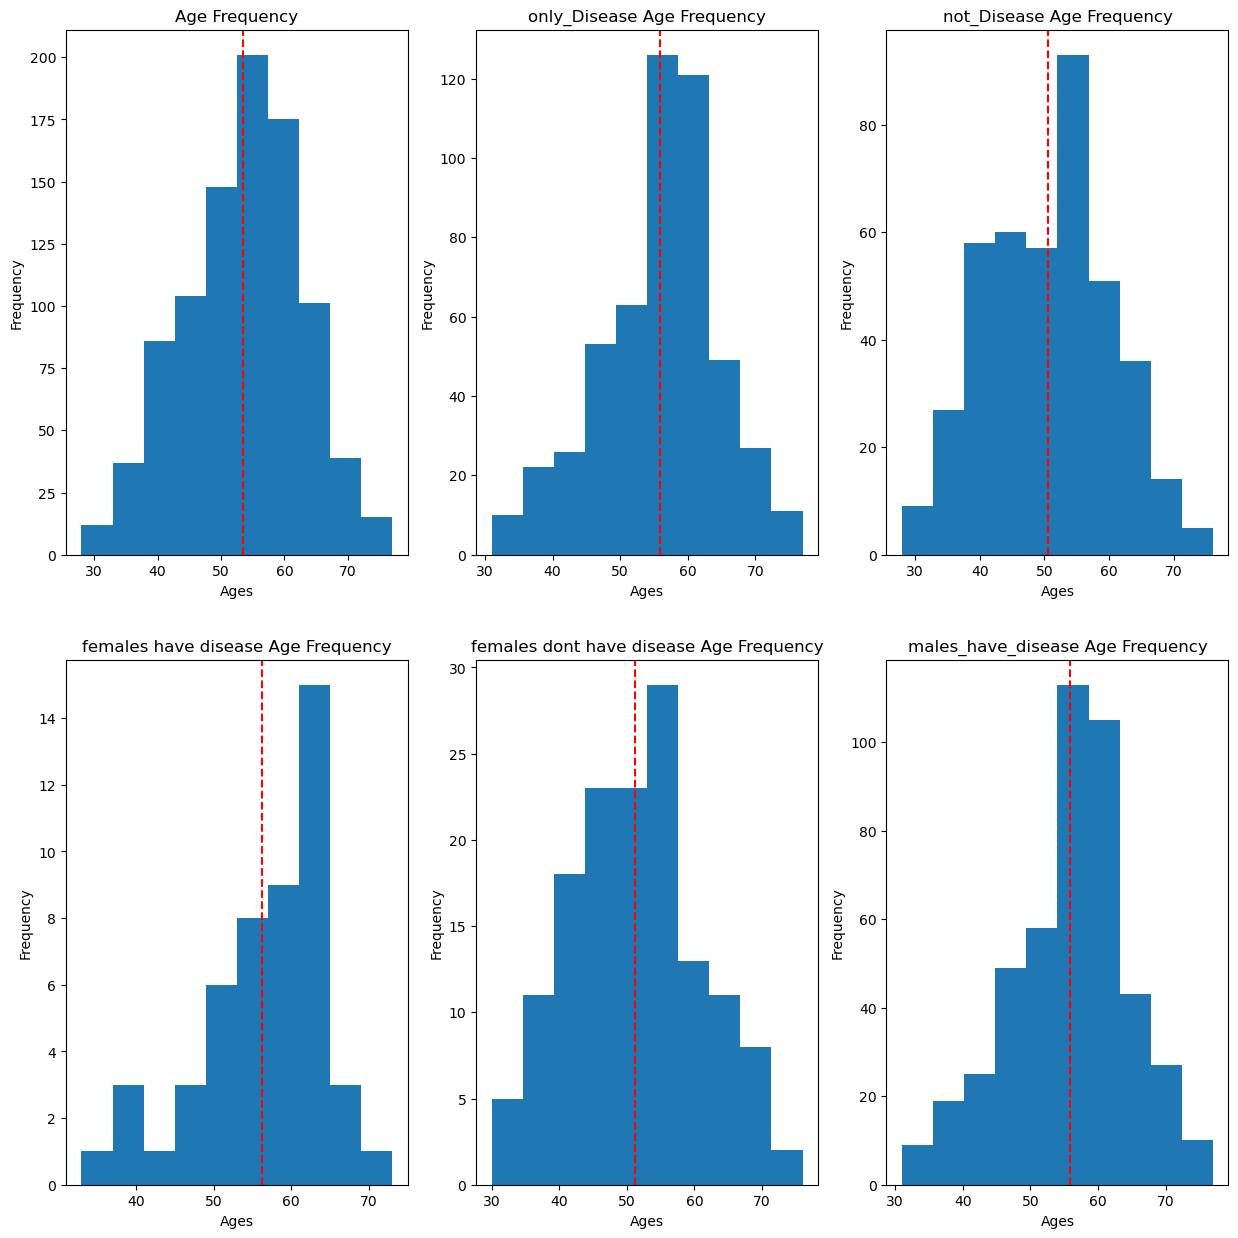

In [ ]:
only_Disease = df[df["HeartDisease"] == 1]
not_Disease = df[df["HeartDisease"] == 0]

over_50_years = df[df["Age"] > 50]
over_50_disease = over_50_years[over_50_years["HeartDisease"] == 1]
over_50_not_disease = over_50_years[over_50_years["HeartDisease"] == 0]

younger_than_50 = df[df['Age'] < 50]
younger_50_disease = younger_than_50[younger_than_50["HeartDisease"] == 1]
younger_50_no_disease = younger_than_50[younger_than_50["HeartDisease"] == 0]


females = df[df['Sex'] == "F"]
females_have_disease = females[females["HeartDisease"] == 1]
females_dont_have_disease = females[females["HeartDisease"] == 0]


males = df[df['Sex'] == "M"]
males_have_disease = males[males["HeartDisease"] == 1]
males_dont_have_disease = males[males["HeartDisease"] == 0]


#Age plots

fig , ((ax1 , ax2 , ax3) , (ax4 , ax5 , ax6)) = plt.subplots(
nrows = 2 , ncols = 3 , figsize = (15 , 15)
)
fig_1 = ax1.hist(df["Age"])
ax1.set(title= "Age Frequency" , xlabel = 'Ages' , ylabel = "Frequency")
ax1.axvline(df["Age"].mean() , c = "red" , linestyle = "--" , label = "Mean Age")

fig_2 = ax2.hist(only_Disease["Age"])
ax2.set(title= "only_Disease Age Frequency" , xlabel = 'Ages' , ylabel = "Frequency")
ax2.axvline(only_Disease["Age"].mean() , c = "red" , linestyle = "--" , label = "Mean Age")


fig_3 = ax3.hist(not_Disease["Age"])
ax3.set(title= "not_Disease Age Frequency" , xlabel = 'Ages' , ylabel = "Frequency")
ax3.axvline(not_Disease["Age"].mean() , c = "red" , linestyle = "--" , label = "Mean Age")


fig_4 = ax4.hist(females_have_disease["Age"])
ax4.set(title= "females have disease Age Frequency" , xlabel = 'Ages' , ylabel = "Frequency")
ax4.axvline(females_have_disease["Age"].mean() , c = "red" , linestyle = "--" , label = "Mean Age")


fig_5 = ax5.hist(females_dont_have_disease["Age"])
ax5.set(title= "females dont have disease Age Frequency" , xlabel = 'Ages' , ylabel = "Frequency")
ax5.axvline(females_dont_have_disease["Age"].mean() , c = "red" , linestyle = "--" , label = "Mean Age")


fig_6 = ax6.hist(males_have_disease["Age"])
ax6.set(title= "males_have_disease Age Frequency" , xlabel = 'Ages' , ylabel = "Frequency")
ax6.axvline(males_have_disease["Age"].mean() , c = "red" , linestyle = "--" , label = "Mean Age")

In [ ]:
df.MaxHR.value_counts()

MaxHR
150    43
140    41
120    36
130    33
160    25
       ..
63      1
83      1
60      1
78      1
202     1
Name: count, Length: 119, dtype: int64

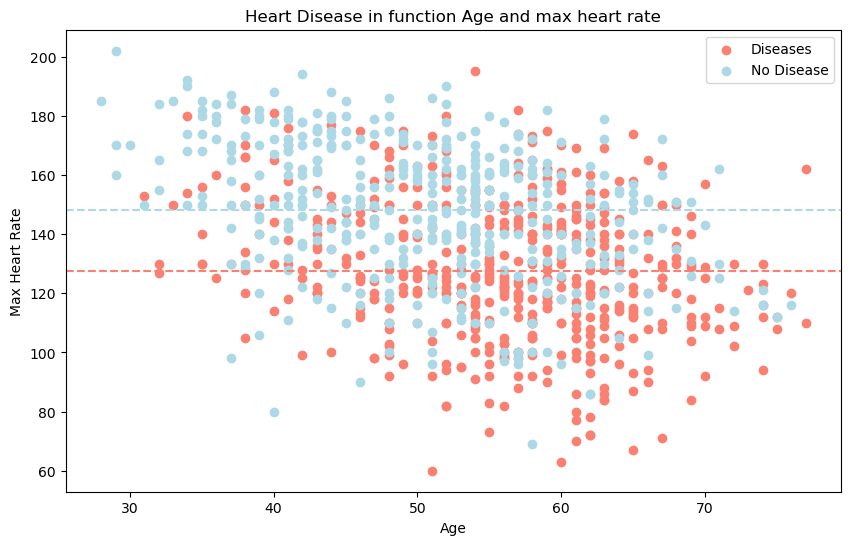

In [ ]:
plt.figure(figsize=(10, 6))

plt.scatter(df.Age[df.HeartDisease == 1],
             df.MaxHR[df.HeartDisease ==1],
            c = "salmon",
            ),
plt.scatter(df.Age[df.HeartDisease == 0],
            df.MaxHR[df.HeartDisease == 0],
            c = "lightblue"
            )
plt.axhline(y= df.MaxHR[df.HeartDisease == 0].mean() , color = "lightblue" , ls = "--");
plt.axhline(y= df.MaxHR[df.HeartDisease == 1].mean() , color = "salmon" , ls = "--");


plt.title("Heart Disease in function Age and max heart rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Diseases" , "No Disease"])

In [ ]:
df.ChestPainType.value_counts()

ChestPainType
ASY    496
NAP    203
ATA    173
TA      46
Name: count, dtype: int64

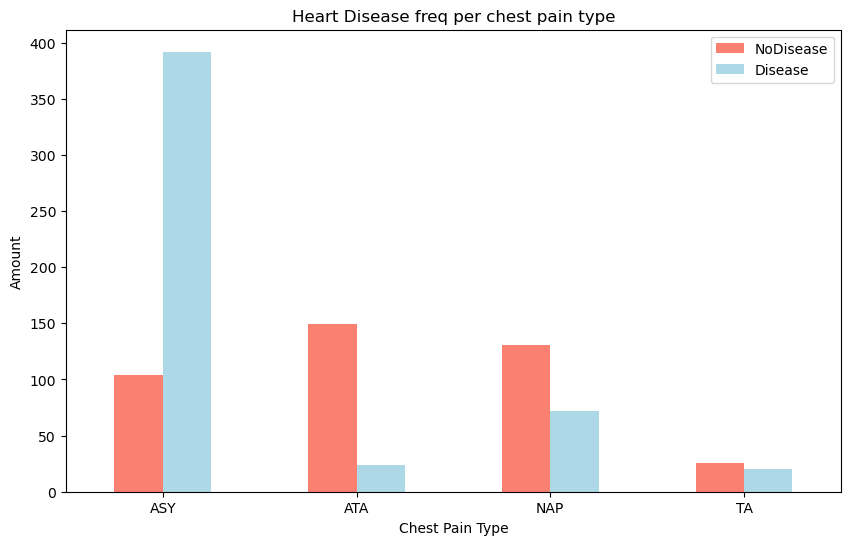

In [ ]:
pd.crosstab(df.ChestPainType , df.HeartDisease).plot(kind="bar" , figsize=(10, 6) , color = ["salmon","lightblue"] );

plt.title("Heart Disease freq per chest pain type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Amount")
plt.legend(["NoDisease" , "Disease"]);
plt.xticks(rotation = 0);

In [ ]:
df.RestingECG.value_counts(
)

RestingECG
Normal    552
LVH       188
ST        178
Name: count, dtype: int64

Encoding categorical Features : Sex , ChestPainType , RestingECG , ExerciseAngina , ST_Slope

In [ ]:
df_copy = df

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

#Encode Sex Feature
label_encoder.fit(df_copy["Sex"])
df_copy["Sex_en"] = label_encoder.fit_transform(df_copy["Sex"])
df_copy.drop("Sex",axis=1,inplace=True)

In [ ]:
label_encoder.fit(df_copy["ChestPainType"])
df_copy["ChestPainType_en"] = label_encoder.fit_transform(df_copy["ChestPainType"])
df_copy.drop("ChestPainType",axis=1,inplace=True)
df_copy

,Age,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,Sex_en,ChestPainType_en
0,40,140.0,289.0,NaN,Normal,172,N,0.0,Up,0,1,1
1,49,160.0,180.0,NaN,Normal,156,N,1.0,Flat,1,0,2
2,37,130.0,283.0,NaN,ST,98,N,0.0,Up,0,1,1
3,48,138.0,214.0,NaN,Normal,108,Y,1.5,Flat,1,0,0
4,54,150.0,195.0,NaN,Normal,122,N,0.0,Up,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110.0,264.0,NaN,Normal,132,N,1.2,Flat,1,1,3
914,68,144.0,193.0,1.0,Normal,141,N,3.4,Flat,1,1,0
915,57,130.0,131.0,NaN,Normal,115,Y,1.2,Flat,1,1,0
916,57,130.0,236.0,NaN,LVH,174,N,0.0,Flat,1,0,1


In [ ]:
label_encoder.fit(df_copy["RestingECG"])
df_copy["RestingECG_en"] = label_encoder.fit_transform(df_copy["RestingECG"])
df_copy.drop("RestingECG",axis=1,inplace=True)
df_copy

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,Sex_en,ChestPainType_en,RestingECG_en
0,40,140.0,289.0,NaN,172,N,0.0,Up,0,1,1,1
1,49,160.0,180.0,NaN,156,N,1.0,Flat,1,0,2,1
2,37,130.0,283.0,NaN,98,N,0.0,Up,0,1,1,2
3,48,138.0,214.0,NaN,108,Y,1.5,Flat,1,0,0,1
4,54,150.0,195.0,NaN,122,N,0.0,Up,0,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110.0,264.0,NaN,132,N,1.2,Flat,1,1,3,1
914,68,144.0,193.0,1.0,141,N,3.4,Flat,1,1,0,1
915,57,130.0,131.0,NaN,115,Y,1.2,Flat,1,1,0,1
916,57,130.0,236.0,NaN,174,N,0.0,Flat,1,0,1,0


In [ ]:
label_encoder.fit(df_copy["ExerciseAngina"])
df_copy["ExerciseAngina_en"] = label_encoder.fit_transform(df_copy["ExerciseAngina"])
df_copy.drop("ExerciseAngina",axis=1,inplace=True)
df_copy

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,ST_Slope,HeartDisease,Sex_en,ChestPainType_en,RestingECG_en,ExerciseAngina_en
0,40,140.0,289.0,NaN,172,0.0,Up,0,1,1,1,0
1,49,160.0,180.0,NaN,156,1.0,Flat,1,0,2,1,0
2,37,130.0,283.0,NaN,98,0.0,Up,0,1,1,2,0
3,48,138.0,214.0,NaN,108,1.5,Flat,1,0,0,1,1
4,54,150.0,195.0,NaN,122,0.0,Up,0,1,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110.0,264.0,NaN,132,1.2,Flat,1,1,3,1,0
914,68,144.0,193.0,1.0,141,3.4,Flat,1,1,0,1,0
915,57,130.0,131.0,NaN,115,1.2,Flat,1,1,0,1,1
916,57,130.0,236.0,NaN,174,0.0,Flat,1,0,1,0,0


In [ ]:
label_encoder.fit(df_copy["ST_Slope"])
df_copy["ST_Slope_en"] = label_encoder.fit_transform(df_copy["ST_Slope"])
df_copy.drop("ST_Slope",axis=1,inplace=True)
df_copy

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_en,ChestPainType_en,RestingECG_en,ExerciseAngina_en,ST_Slope_en
0,40,140.0,289.0,NaN,172,0.0,0,1,1,1,0,2
1,49,160.0,180.0,NaN,156,1.0,1,0,2,1,0,1
2,37,130.0,283.0,NaN,98,0.0,0,1,1,2,0,2
3,48,138.0,214.0,NaN,108,1.5,1,0,0,1,1,1
4,54,150.0,195.0,NaN,122,0.0,0,1,2,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110.0,264.0,NaN,132,1.2,1,1,3,1,0,1
914,68,144.0,193.0,1.0,141,3.4,1,1,0,1,0,1
915,57,130.0,131.0,NaN,115,1.2,1,1,0,1,1,1
916,57,130.0,236.0,NaN,174,0.0,1,0,1,0,0,1


In [ ]:
df_copy.corr()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_en,ChestPainType_en,RestingECG_en,ExerciseAngina_en,ST_Slope_en
Age,1.000000,0.263084,0.058758,NaN,-0.382045,0.258612,0.282039,0.055750,-0.077150,-0.007484,0.215793,-0.268264
RestingBP,0.263084,1.000000,0.095939,NaN,-0.109693,0.174252,0.117990,0.009427,-0.011020,0.023455,0.153064,-0.082155
Cholesterol,0.058758,0.095939,1.000000,NaN,-0.019856,0.058488,0.103866,-0.107045,-0.102644,-0.070544,0.086768,-0.078516
FastingBS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MaxHR,-0.382045,-0.109693,-0.019856,NaN,1.000000,-0.160691,-0.400421,-0.189186,0.289123,-0.179276,-0.370425,0.343419
Oldpeak,0.258612,0.174252,0.058488,NaN,-0.160691,1.000000,0.403951,0.105734,-0.177377,-0.020438,0.408752,-0.501921
HeartDisease,0.282039,0.117990,0.103866,NaN,-0.400421,0.403951,1.000000,0.305445,-0.386828,0.057384,0.494282,-0.558771
Sex_en,0.055750,0.009427,-0.107045,NaN,-0.189186,0.105734,0.305445,1.000000,-0.126559,0.071552,0.190664,-0.150693
ChestPainType_en,-0.077150,-0.011020,-0.102644,NaN,0.289123,-0.177377,-0.386828,-0.126559,1.000000,-0.072537,-0.354727,0.213521
RestingECG_en,-0.007484,0.023455,-0.070544,NaN,-0.179276,-0.020438,0.057384,0.071552,-0.072537,1.000000,0.077500,-0.006778


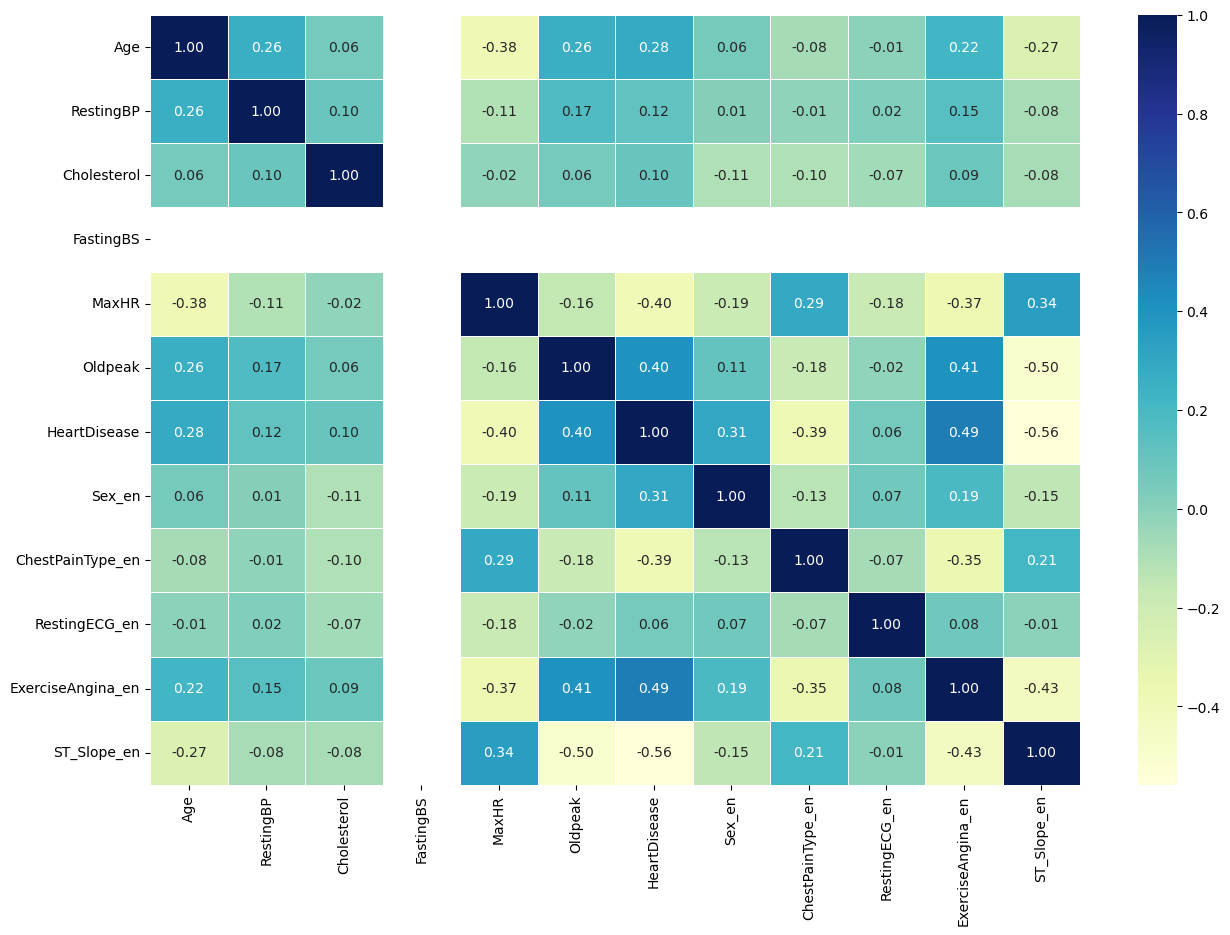

In [ ]:
corr_mat = df.corr()
fig , ax = plt.subplots(figsize = (15 , 10))
ax = sns.heatmap(corr_mat , annot=True , linewidths=0.5 , fmt="0.2f" , cmap="YlGnBu")

Modelling

In [ ]:
x = df.drop('HeartDisease' , axis = 1)
y = df["HeartDisease"]
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = 0.2)
len(y_train), len(x_train) , len(y_test) , len(x_test)

(734, 734, 184, 184)

Trying 4 models [Logistic Regression , KNN , RandomForest classifier , XGBClassifier ]

In [ ]:
x_train = x_train.dropna()
y_train = y_train[x_train.index]  # Adjust y_train accordingly
x_test = x_test.dropna()
y_test = y_test[x_test.index]  # Adjust y_test accordingly

In [ ]:
from sklearn.impute import SimpleImputer

# Create the imputer
imputer = SimpleImputer(strategy='mean')  # You can use other strategies like 'median' or 'most_frequent'

# Fit and transform on training data
x_train_imputed = imputer.fit_transform(x_train)

# Transform testing data
x_test_imputed = imputer.transform(x_test)

In [ ]:
models = {
    "Logistic Regression" : LogisticRegression() ,
    "KNN" : KNeighborsClassifier() ,
    "Random Forest" : RandomForestClassifier() ,
    "XGBClassifier" : XGBClassifier()
}


def fit_and_score(models , x_train , x_test , y_train , y_test):
    model_scores = {}

    for name , model in models.items():
        model.fit(x_train , y_train)

        model_scores[name] = model.score(x_test , y_test) #--> evaluate each model
    return model_scores


model_scores = fit_and_score(models , x_train , x_test , y_train , y_test)
model_scores

/Users/ritushreedey/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8947368421052632,
 'KNN': 0.7368421052631579,
 'Random Forest': 0.9473684210526315,
 'XGBClassifier': 0.9473684210526315}

<Axes: >

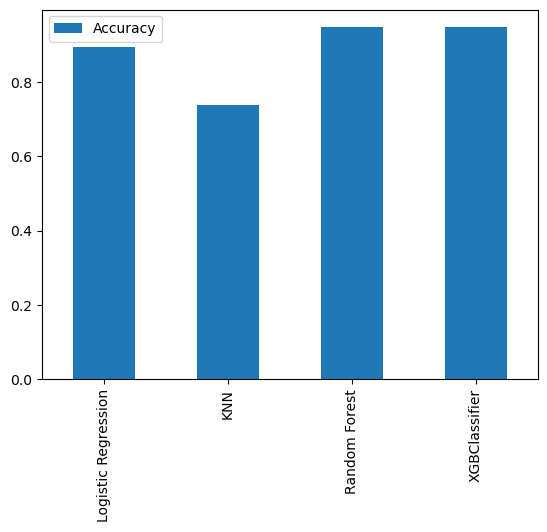

In [ ]:
model_compare = pd.DataFrame(model_scores, index=["Accuracy"]) #--> Turning the models scores object into pandas DataFrame to plot it

model_compare.T.plot.bar()

Tuning KNeighborsClassifier

In [ ]:
train_score = []

test_score = []

neigbors = range(1 , 21)

knn = KNeighborsClassifier()


for i in neigbors:

    knn.set_params(n_neighbors = i)

    knn.fit(x_train , y_train)

    train_score.append(knn.score(x_train , y_train))

    test_score.append(knn.score(x_test , y_test))

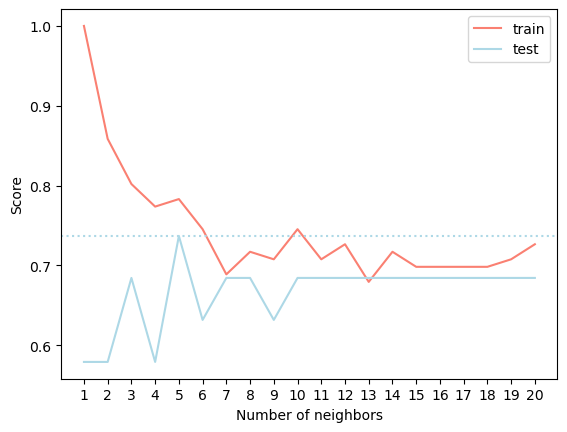

In [ ]:
plt.plot(neigbors , train_score , label = "train score" , color = "salmon")
plt.plot(neigbors , test_score , label = "test score" , color = "lightblue")
plt.axhline(y = max(test_score) , ls = ":" , color = "lightblue")
plt.xticks(np.arange(1 , 21 , 1))
plt.xlabel("Number of neighbors")
plt.ylabel("Score")
plt.legend(['train' , 'test'])

Hyperparameter tuning with RandomizedSearchCV <br>
-Logistic Regression <br>
-RandomForest clf <br>

In [ ]:
LogisticRegression_grid  = {"C" : np.logspace(-1 , 10 , 10) ,
                "solver" : ["liblinear", "lbfgs" , "newton-cg"  ]
                }

RandomForest_grid = {"n_estimators" : np.arange(10 , 1000 , 60) ,
           "max_depth" : [None , 3, 5 ,10],
           "min_samples_split" : np.arange(2, 20 , 2),
           "min_samples_leaf" :np.arange(1 , 20 , 2)
            }

In [ ]:
#Tune Logistic Regression

RS_LogisticRegression = RandomizedSearchCV(
                                LogisticRegression() ,#--> Our Model
                                param_distributions= LogisticRegression_grid , #--> The grid defined upove
                                cv = 10 ,
                                n_iter= 200 ,
                                verbose=True
                                 )


RS_LogisticRegression.fit(x_train , y_train)

/Users/ritushreedey/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_search.py:307: UserWarning: The total space of parameters 30 is smaller than n_iter=200. Running 30 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/Users/ritushreedey/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/ritushreedey/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the 

Fitting 10 folds for each of 30 candidates, totalling 300 fits


/Users/ritushreedey/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/ritushreedey/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.ht

RandomizedSearchCV(cv=10, estimator=LogisticRegression(), n_iter=200,
                   param_distributions={'C': array([1.00000000e-01, 1.66810054e+00, 2.78255940e+01, 4.64158883e+02,
       7.74263683e+03, 1.29154967e+05, 2.15443469e+06, 3.59381366e+07,
       5.99484250e+08, 1.00000000e+10]),
                                        'solver': ['liblinear', 'lbfgs',
                                                   'newton-cg']},
                   verbose=True)

In [ ]:
RS_LogisticRegression.best_params_

{'solver': 'liblinear', 'C': 0.1}

In [ ]:
RS_LogisticRegression.score(x_test , y_test)

0.8421052631578947

In [ ]:
randomizerSearch_RandomForest = RandomizedSearchCV(
    RandomForestClassifier() ,
    param_distributions= RandomForest_grid,
    cv = 10 ,
    n_iter= 10 ,
    verbose=True
                          )


randomizerSearch_RandomForest.fit(x_train , y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  70, 130, 190, 250, 310, 370, 430, 490, 550, 610, 670, 730,
       790, 850, 910, 970])},
                   verbose=True)

In [ ]:
randomizerSearch_RandomForest.best_params_

{'n_estimators': 310,
 'min_samples_split': 16,
 'min_samples_leaf': 7,
 'max_depth': 3}

In [ ]:
randomizerSearch_RandomForest.score(x_test , y_test)

0.8947368421052632

Plotting the accuracy Before / after Tuning

<Axes: title={'center': 'Accuracy Before and After Hyperparameters Tuning using RandomizedSearch'}>

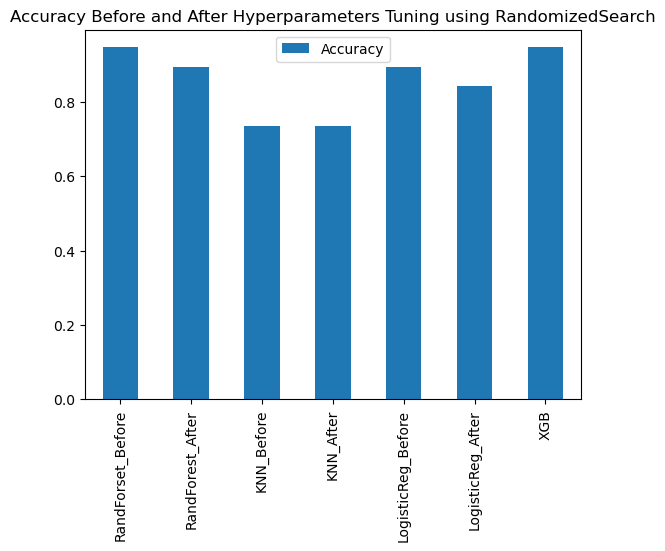

In [ ]:
all_the_scores = {
"RandForset_Before": model_scores["Random Forest"] ,
"RandForest_After" : randomizerSearch_RandomForest.score(x_test , y_test),
"KNN_Before" : model_scores["KNN"],
"KNN_After" : max(test_score) ,
"LogisticReg_Before" :  model_scores["Logistic Regression"],
"LogisticReg_After": RS_LogisticRegression.score(x_test , y_test) ,
"XGB" : model_scores["XGBClassifier"]
}

model_compare_2 = pd.DataFrame(all_the_scores, index=["Accuracy"])

model_compare_2.T.plot.bar(title = 'Accuracy Before and After Hyperparameters Tuning using RandomizedSearch')